In [1]:
# Todd McCullough
# 2020
import re
import numpy as np
import pandas as pd
import cpl_main as cpl
import random

In [2]:
results = pd.read_csv(f'datasets/soccer-nn-train.csv')
print(results.head(2))

  game      team    p1    p2    p3    p4    p5    p6    p7    p8    p9  p9.1  \
0   I1  Forge FC  0.71  0.89  0.74  0.71  0.48  0.89  0.77  0.52  0.50  0.48   
1   I1  York9 FC  0.93  0.92  0.91  0.86  0.41  0.78  0.65  0.64  0.46  0.70   

    p10  p11  p12  p13  r  s  
0  0.42  0.0  0.0  0.0  2  1  
1  0.47  0.0  0.0  0.0  2  1  


In [3]:
print(results.shape)

(3883, 18)


In [4]:
def pump_it_up(db):
    df = db.copy()
    dc = df.copy()
    m = df['p1'].copy()
    n = df['p2'].copy()
    o = df['p3'].copy()
    p = df['p4'].copy()
    q = df['p5'].copy()
    r = df['p6'].copy()
    df['p1'] = dc.pop('p8')
    df['p2'] = dc.pop('p10')
    df['p3'] = dc.pop('p12')
    df['p4'] = dc.pop('p9')
    df['p5'] = dc.pop('p11')
    df['p6'] = dc.pop('p13')
    df['p7'] = m
    df['p8'] = n
    df['p9'] = o
    df['p10'] = p
    df['p11'] = q
    df['p12'] = r
    df['p13'] = dc.pop('p7')
    dc = df.copy()
    db = pd.concat([db,df])
    df = dc.copy()
    m = df['p13'].copy()
    n = df['p12'].copy()
    o = df['p11'].copy()
    p = df['p10'].copy()
    q = df['p9'].copy()
    r = df['p8'].copy()
    df['p13'] = dc.pop('p8')
    df['p12'] = dc.pop('p10')
    df['p11'] = dc.pop('p12')
    df['p10'] = dc.pop('p9')
    df['p9'] = dc.pop('p11')
    df['p8'] = dc.pop('p13')
    df['p7'] = m
    df['p6'] = n
    df['p5'] = o
    df['p4'] = p
    df['p3'] = q
    df['p2'] = r
    df['p1'] = dc.pop('p7')
    #dc = df.copy()
    db = pd.concat([db,df])
    db = cpl.index_reset(db)
    return db

In [5]:
#df = pump_it_up(results)
#print(df.shape)

In [6]:
db = results.copy()

In [7]:
print(db.shape)

(3883, 18)


In [8]:
db.pop('game')
db.pop('team')
'''y = db.pop('s')
db.pop('r')'''
X = db

In [9]:
X.head(2)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p9.1,p10,p11,p12,p13,r,s
0,0.71,0.89,0.74,0.71,0.48,0.89,0.77,0.52,0.50,0.48,0.42,0.0,0.0,0.0,2,1
1,0.93,0.92,0.91,0.86,0.41,0.78,0.65,0.64,0.46,0.70,0.47,0.0,0.0,0.0,2,1


In [10]:
#X['all'] = round(X.sum(axis = 1, skipna = True) / 13,2)

In [11]:
print(X.head(2))

     p1    p2    p3    p4    p5    p6    p7    p8    p9  p9.1   p10  p11  p12  \
0  0.71  0.89  0.74  0.71  0.48  0.89  0.77  0.52  0.50  0.48  0.42  0.0  0.0   
1  0.93  0.92  0.91  0.86  0.41  0.78  0.65  0.64  0.46  0.70  0.47  0.0  0.0   

   p13  r  s  
0  0.0  2  1  
1  0.0  2  1  


In [12]:
from math import sqrt
from sklearn.metrics import mean_squared_error

#importing libraries from sklearn
from sklearn import tree
#from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler#,Imputer
from sklearn import metrics
# import algorithm modules
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [13]:
print(tf.__version__)

2.1.0


In [14]:
high = X[X['s'] > 2]
high.head(2)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p9.1,p10,p11,p12,p13,r,s
12,0.71,0.89,0.74,0.71,0.48,0.89,0.77,0.52,0.50,0.48,0.42,0.0,0.0,0.0,3,3
43,0.79,0.91,0.75,0.37,0.33,0.87,0.66,0.66,0.62,0.73,0.64,0.0,0.0,0.0,3,3


In [15]:
h_y = high.pop('s')

In [16]:
low = X[X['s'] <= 2]
low.head(2)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p9.1,p10,p11,p12,p13,r,s
0,0.71,0.89,0.74,0.71,0.48,0.89,0.77,0.52,0.50,0.48,0.42,0.0,0.0,0.0,2,1
1,0.93,0.92,0.91,0.86,0.41,0.78,0.65,0.64,0.46,0.70,0.47,0.0,0.0,0.0,2,1


In [17]:
l_y = low.pop('s')

In [18]:
print(high.shape,low.shape)

(731, 15) (3152, 15)


In [19]:
h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(high, h_y, test_size=0.2, random_state=7)
seed = 7

In [20]:
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(low, l_y, test_size=0.2, random_state=7)
seed = 7

In [21]:
l_X_train = pd.concat([l_X_train,h_X_train])

In [22]:
l_X_test = pd.concat([l_X_test,h_X_test])

In [23]:
l_X_train.shape[0]

3105

In [24]:
l_X_train.shape[0] + l_X_test.shape[0]

3883

In [25]:
l_y_train = pd.concat([l_y_train,h_y_train])

In [26]:
l_y_test = pd.concat([l_y_test,h_y_test])

In [27]:
l_y_train.shape[0] + l_y_test.shape[0]

3883

In [28]:
l_y_test.shape[0] + l_X_test.shape[0]

1556

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
seed = 7

In [29]:
X_train, X_test, y_train, y_test = l_X_train, l_X_test, l_y_train, l_y_test

In [30]:
db.shape

(3883, 16)

In [31]:
X_train.shape

(3105, 15)

In [32]:
X_test.shape

(778, 15)

In [33]:
X_train.pop('r')
X_test.pop('r')
X_train.shape[0] + X_test.shape[0]

3883

In [34]:
#Linear Regression Model
def linearRegression():
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

lr = linearRegression()

print('\nLinear Regression Model')
print('\nRMSE: ', sqrt(mean_squared_error(y_test,lr.predict(X_test))))
print('\nScore',round(lr.score(X_test, y_test)*100,2))

#DecisionTreeRegressor
def decisionTree():
    model = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=8, max_features='log2')
    model.fit(X_train, y_train)
    return model
dt = decisionTree()

print('\nDecision Tree Regression Model')
print('\nRMSE: ', sqrt(mean_squared_error(y_test, dt.predict(X_test))))
print('\nScore',round(dt.score(X_test, y_test)*100,2))

#Random Forest Regression
def forestRegression():
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    model.fit(X_train, y_train)
    return model

rf = forestRegression()

print('\nRandom Forest Regression Model')
print('\nRMSE: ', sqrt(mean_squared_error(y_test,rf.predict(X_test))))
print('\nScore',round(rf.score(X_test, y_test)*100,2))

from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=[('lr', lr), ('dt', dt), ('rf', rf)])
vr = vr.fit(X_train, y_train)

print('\nVoting Regressor Model')
print('\nRMSE: ', sqrt(mean_squared_error(y_test,vr.predict(X_test))))
print('\nScore',round(vr.score(X_test, y_test)*100,2))


Linear Regression Model

RMSE:  1.236319605381782

Score 1.19

Decision Tree Regression Model

RMSE:  1.3045779271254694

Score -10.02

Random Forest Regression Model

RMSE:  1.2723227667684853

Score -4.65

Voting Regressor Model

RMSE:  1.2482340232385531

Score -0.72


In [35]:
def kerasSequential():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss = 'mse',
                optimizer = tf.keras.optimizers.RMSprop(0.1),
                metrics = ['mae', 'mse'])

    return model

In [36]:
ks = kerasSequential()
print(ks.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
trained_weight = ks.get_weights()[0]
trained_bias = ks.get_weights()[1]

EPOCHS = 450
history = ks.fit(X_train,
                 y_train,
                 epochs = EPOCHS,
                 batch_size = 128,
                 validation_split = 0.2,
                 verbose = 1)

hist = pd.DataFrame(history.history)
mse = hist['mse']
epochs = history.epoch

Train on 2484 samples, validate on 621 samples
Epoch 1/450
2484/2484 [==============================] - 1s 541us/sample - loss: 4545.4927 - mae: 16.1353 - mse: 4545.4932 - val_loss: 10.5876 - val_mae: 3.1032 - val_mse: 10.5876
Epoch 2/450
2484/2484 [==============================] - 0s 45us/sample - loss: 0.9820 - mae: 0.8417 - mse: 0.9820 - val_loss: 8.0529 - val_mae: 2.6826 - val_mse: 8.0529
Epoch 3/450
2484/2484 [==============================] - 0s 44us/sample - loss: 0.6525 - mae: 0.6789 - mse: 0.6525 - val_loss: 6.4753 - val_mae: 2.3834 - val_mse: 6.4753
Epoch 4/450
2484/2484 [==============================] - 0s 46us/sample - loss: 0.6059 - mae: 0.6418 - mse: 0.6059 - val_loss: 6.1776 - val_mae: 2.3241 - val_mse: 6.1776
Epoch 5/450
2484/2484 [==============================] - 0s 52us/sample - loss: 0.6029 - mae: 0.6359 - mse: 0.6029 - val_loss: 6.2491 - val_mae: 2.3394 - val_mse: 6.2491
Epoch 6/450
2484/2484 [==============================] - 0s 50us/sample - loss: 0.6148 - mae:

2484/2484 [==============================] - 0s 95us/sample - loss: 0.6025 - mae: 0.6183 - mse: 0.6025 - val_loss: 6.4019 - val_mae: 2.3703 - val_mse: 6.4019
Epoch 49/450
2484/2484 [==============================] - 0s 82us/sample - loss: 0.6035 - mae: 0.6226 - mse: 0.6035 - val_loss: 6.2005 - val_mae: 2.3302 - val_mse: 6.2005
Epoch 50/450
2484/2484 [==============================] - 0s 68us/sample - loss: 0.6017 - mae: 0.6181 - mse: 0.6017 - val_loss: 7.5953 - val_mae: 2.6026 - val_mse: 7.5953
Epoch 51/450
2484/2484 [==============================] - 0s 46us/sample - loss: 0.6061 - mae: 0.6203 - mse: 0.6061 - val_loss: 6.3927 - val_mae: 2.3684 - val_mse: 6.3927
Epoch 52/450
2484/2484 [==============================] - 0s 47us/sample - loss: 0.6068 - mae: 0.6222 - mse: 0.6068 - val_loss: 6.0254 - val_mae: 2.2949 - val_mse: 6.0254
Epoch 53/450
2484/2484 [==============================] - 0s 59us/sample - loss: 0.5980 - mae: 0.6185 - mse: 0.5980 - val_loss: 5.4179 - val_mae: 2.1670 - val

Epoch 96/450
2484/2484 [==============================] - 0s 64us/sample - loss: 0.5992 - mae: 0.6156 - mse: 0.5992 - val_loss: 5.6159 - val_mae: 2.2067 - val_mse: 5.6159
Epoch 97/450
2484/2484 [==============================] - 0s 69us/sample - loss: 0.5995 - mae: 0.6192 - mse: 0.5995 - val_loss: 6.8066 - val_mae: 2.4518 - val_mse: 6.8066
Epoch 98/450
2484/2484 [==============================] - 0s 86us/sample - loss: 0.5981 - mae: 0.6160 - mse: 0.5981 - val_loss: 5.7705 - val_mae: 2.2424 - val_mse: 5.7705
Epoch 99/450
2484/2484 [==============================] - 0s 81us/sample - loss: 0.6014 - mae: 0.6272 - mse: 0.6014 - val_loss: 5.6787 - val_mae: 2.2230 - val_mse: 5.6787
Epoch 100/450
2484/2484 [==============================] - 0s 123us/sample - loss: 0.5995 - mae: 0.6230 - mse: 0.5995 - val_loss: 5.8751 - val_mae: 2.2641 - val_mse: 5.8751
Epoch 101/450
2484/2484 [==============================] - 0s 106us/sample - loss: 0.5980 - mae: 0.6167 - mse: 0.5980 - val_loss: 6.3229 - val_

2484/2484 [==============================] - 0s 68us/sample - loss: 0.5996 - mae: 0.6164 - mse: 0.5996 - val_loss: 6.1374 - val_mae: 2.3177 - val_mse: 6.1374
Epoch 144/450
2484/2484 [==============================] - 0s 62us/sample - loss: 0.5951 - mae: 0.6197 - mse: 0.5951 - val_loss: 6.4577 - val_mae: 2.3817 - val_mse: 6.4577
Epoch 145/450
2484/2484 [==============================] - 0s 71us/sample - loss: 0.5985 - mae: 0.6140 - mse: 0.5985 - val_loss: 6.3573 - val_mae: 2.3612 - val_mse: 6.3573
Epoch 146/450
2484/2484 [==============================] - 0s 58us/sample - loss: 0.5984 - mae: 0.6227 - mse: 0.5984 - val_loss: 6.4850 - val_mae: 2.3872 - val_mse: 6.4850
Epoch 147/450
2484/2484 [==============================] - 0s 53us/sample - loss: 0.6016 - mae: 0.6196 - mse: 0.6016 - val_loss: 6.9197 - val_mae: 2.4738 - val_mse: 6.9197
Epoch 148/450
2484/2484 [==============================] - 0s 65us/sample - loss: 0.6033 - mae: 0.6256 - mse: 0.6033 - val_loss: 5.9438 - val_mae: 2.2783 

Epoch 191/450
2484/2484 [==============================] - 0s 77us/sample - loss: 0.5966 - mae: 0.6155 - mse: 0.5966 - val_loss: 5.4736 - val_mae: 2.1791 - val_mse: 5.4736
Epoch 192/450
2484/2484 [==============================] - 0s 68us/sample - loss: 0.5951 - mae: 0.6178 - mse: 0.5951 - val_loss: 5.6323 - val_mae: 2.2131 - val_mse: 5.6323
Epoch 193/450
2484/2484 [==============================] - 0s 79us/sample - loss: 0.6004 - mae: 0.6183 - mse: 0.6004 - val_loss: 6.5833 - val_mae: 2.4070 - val_mse: 6.5833
Epoch 194/450
2484/2484 [==============================] - 0s 61us/sample - loss: 0.5953 - mae: 0.6177 - mse: 0.5953 - val_loss: 6.5327 - val_mae: 2.3968 - val_mse: 6.5327
Epoch 195/450
2484/2484 [==============================] - 0s 79us/sample - loss: 0.5970 - mae: 0.6168 - mse: 0.5970 - val_loss: 7.5319 - val_mae: 2.5722 - val_mse: 7.5319
Epoch 196/450
2484/2484 [==============================] - 0s 70us/sample - loss: 0.6015 - mae: 0.6232 - mse: 0.6015 - val_loss: 6.4380 - va

2484/2484 [==============================] - 0s 71us/sample - loss: 0.5960 - mae: 0.6200 - mse: 0.5960 - val_loss: 6.8879 - val_mae: 2.4648 - val_mse: 6.8879
Epoch 239/450
2484/2484 [==============================] - 0s 56us/sample - loss: 0.5990 - mae: 0.6192 - mse: 0.5990 - val_loss: 5.9045 - val_mae: 2.2691 - val_mse: 5.9045
Epoch 240/450
2484/2484 [==============================] - 0s 47us/sample - loss: 0.6012 - mae: 0.6194 - mse: 0.6012 - val_loss: 6.2049 - val_mae: 2.3308 - val_mse: 6.2049
Epoch 241/450
2484/2484 [==============================] - 0s 69us/sample - loss: 0.5995 - mae: 0.6132 - mse: 0.5995 - val_loss: 6.3966 - val_mae: 2.3693 - val_mse: 6.3966
Epoch 242/450
2484/2484 [==============================] - 0s 48us/sample - loss: 0.5974 - mae: 0.6156 - mse: 0.5974 - val_loss: 6.7370 - val_mae: 2.4371 - val_mse: 6.7370
Epoch 243/450
2484/2484 [==============================] - 0s 46us/sample - loss: 0.5937 - mae: 0.6131 - mse: 0.5937 - val_loss: 5.6343 - val_mae: 2.2131 

2484/2484 [==============================] - 0s 49us/sample - loss: 0.6018 - mae: 0.6230 - mse: 0.6018 - val_loss: 6.2735 - val_mae: 2.3437 - val_mse: 6.2735
Epoch 286/450
2484/2484 [==============================] - 0s 67us/sample - loss: 0.5959 - mae: 0.6216 - mse: 0.5959 - val_loss: 7.0215 - val_mae: 2.4935 - val_mse: 7.0215
Epoch 287/450
2484/2484 [==============================] - 0s 58us/sample - loss: 0.5996 - mae: 0.6206 - mse: 0.5996 - val_loss: 6.5899 - val_mae: 2.4084 - val_mse: 6.5899
Epoch 288/450
2484/2484 [==============================] - 0s 57us/sample - loss: 0.5997 - mae: 0.6208 - mse: 0.5997 - val_loss: 5.9530 - val_mae: 2.2801 - val_mse: 5.9530
Epoch 289/450
2484/2484 [==============================] - 0s 55us/sample - loss: 0.5981 - mae: 0.6188 - mse: 0.5981 - val_loss: 6.2119 - val_mae: 2.3315 - val_mse: 6.2119
Epoch 290/450
2484/2484 [==============================] - 0s 95us/sample - loss: 0.5997 - mae: 0.6188 - mse: 0.5997 - val_loss: 5.9974 - val_mae: 2.2884 

Epoch 333/450
2484/2484 [==============================] - 0s 49us/sample - loss: 0.5974 - mae: 0.6209 - mse: 0.5974 - val_loss: 5.9728 - val_mae: 2.2841 - val_mse: 5.9728
Epoch 334/450
2484/2484 [==============================] - 0s 47us/sample - loss: 0.5946 - mae: 0.6136 - mse: 0.5946 - val_loss: 6.3092 - val_mae: 2.3520 - val_mse: 6.3092
Epoch 335/450
2484/2484 [==============================] - 0s 54us/sample - loss: 0.5986 - mae: 0.6196 - mse: 0.5986 - val_loss: 5.7487 - val_mae: 2.2338 - val_mse: 5.7487
Epoch 336/450
2484/2484 [==============================] - 0s 43us/sample - loss: 0.5995 - mae: 0.6199 - mse: 0.5995 - val_loss: 5.7583 - val_mae: 2.2397 - val_mse: 5.7583
Epoch 337/450
2484/2484 [==============================] - 0s 42us/sample - loss: 0.6003 - mae: 0.6269 - mse: 0.6003 - val_loss: 5.8445 - val_mae: 2.2574 - val_mse: 5.8445
Epoch 338/450
2484/2484 [==============================] - 0s 42us/sample - loss: 0.5953 - mae: 0.6166 - mse: 0.5953 - val_loss: 6.2155 - va

2484/2484 [==============================] - 0s 50us/sample - loss: 0.6031 - mae: 0.6247 - mse: 0.6031 - val_loss: 5.4389 - val_mae: 2.1716 - val_mse: 5.4389
Epoch 381/450
2484/2484 [==============================] - 0s 59us/sample - loss: 0.6024 - mae: 0.6225 - mse: 0.6024 - val_loss: 6.5326 - val_mae: 2.3957 - val_mse: 6.5326
Epoch 382/450
2484/2484 [==============================] - 0s 46us/sample - loss: 0.6052 - mae: 0.6217 - mse: 0.6052 - val_loss: 6.2616 - val_mae: 2.3423 - val_mse: 6.2616
Epoch 383/450
2484/2484 [==============================] - 0s 58us/sample - loss: 0.5960 - mae: 0.6119 - mse: 0.5960 - val_loss: 6.6532 - val_mae: 2.4191 - val_mse: 6.6532
Epoch 384/450
2484/2484 [==============================] - 0s 50us/sample - loss: 0.5970 - mae: 0.6197 - mse: 0.5970 - val_loss: 6.2878 - val_mae: 2.3477 - val_mse: 6.2878
Epoch 385/450
2484/2484 [==============================] - 0s 64us/sample - loss: 0.5991 - mae: 0.6159 - mse: 0.5991 - val_loss: 6.2015 - val_mae: 2.3300 

Epoch 428/450
2484/2484 [==============================] - 0s 76us/sample - loss: 0.6050 - mae: 0.6259 - mse: 0.6050 - val_loss: 6.2283 - val_mae: 2.3359 - val_mse: 6.2283
Epoch 429/450
2484/2484 [==============================] - 0s 71us/sample - loss: 0.5932 - mae: 0.6142 - mse: 0.5932 - val_loss: 6.7912 - val_mae: 2.4467 - val_mse: 6.7912
Epoch 430/450
2484/2484 [==============================] - 0s 65us/sample - loss: 0.5963 - mae: 0.6180 - mse: 0.5963 - val_loss: 6.3961 - val_mae: 2.3688 - val_mse: 6.3961
Epoch 431/450
2484/2484 [==============================] - 0s 72us/sample - loss: 0.5978 - mae: 0.6187 - mse: 0.5978 - val_loss: 5.7977 - val_mae: 2.2479 - val_mse: 5.7977
Epoch 432/450
2484/2484 [==============================] - 0s 51us/sample - loss: 0.5994 - mae: 0.6175 - mse: 0.5994 - val_loss: 6.6487 - val_mae: 2.4183 - val_mse: 6.6487
Epoch 433/450
2484/2484 [==============================] - 0s 74us/sample - loss: 0.5923 - mae: 0.6205 - mse: 0.5923 - val_loss: 6.3335 - va

In [38]:
from matplotlib import pyplot as plt
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")
    # Plot the feature values vs. label values.
    plt.scatter(feature, label)
    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    plt.plot(feature.tolist(), label.tolist(), c='r')
    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, mse):
    """Plot the loss curve, which shows loss vs. epoch."""
    plt.figure()
    plt.xlabel('epochs')
    plt.ylabel('mse')
    plt.plot(epochs, mse, label="Loss")
    plt.legend()
    plt.ylim([mse.min()*0.97, mse.max()])
    plt.show()

In [39]:
#feature = X['all'].copy()
#label = y.copy()

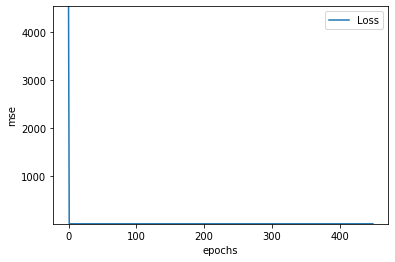

In [40]:
#plot_the_model(trained_weight, trained_bias, feature, label)
plot_the_loss_curve(epochs, mse)

In [41]:
print(hist.describe())

              loss         mae          mse    val_loss     val_mae  \
count   450.000000  450.000000   450.000000  450.000000  450.000000   
mean     10.702289    0.655160    10.702290    6.357828    2.359509   
std     214.248179    0.731521   214.248201    0.548966    0.107965   
min       0.591830    0.608798     0.591830    4.520980    1.959320   
25%       0.596810    0.616190     0.596810    5.998913    2.289028   
50%       0.599018    0.618903     0.599018    6.333093    2.354081   
75%       0.601862    0.621454     0.601862    6.648630    2.419782   
max    4545.492701   16.135311  4545.493164   10.587625    3.103235   

          val_mse  
count  450.000000  
mean     6.357828  
std      0.548966  
min      4.520980  
25%      5.998913  
50%      6.333093  
75%      6.648630  
max     10.587625  


In [42]:
def check(a,b):
    #print('pred :',a,'actual :',b)
    if a == b:
        result = 1
    else:
        result = 0
    return result

In [43]:
print('lr',lr.score(X_train, y_train))
print('dt',dt.score(X_train, y_train))
print('rf',rf.score(X_train, y_train))
print('vr',vr.score(X_train, y_train))
'''ks_test = ks.evaluate(X_train, y_train,verbose=0)
print('ks',ks_test[1])'''

lr 0.030552001390400704
dt 0.11312758360760354
rf 0.490246160220455
vr 0.26288883802891905


"ks_test = ks.evaluate(X_train, y_train,verbose=0)\nprint('ks',ks_test[1])"

In [44]:
def cycle_pred_test(result,num):
    score = check(result,y_test.loc[num])
    return score

def model_pred_test(model):
    pred = []
    numbers = X_test.index
    random_nums = random.choices(numbers, k=50)
    for i in random_nums:
        p = X_test.loc[i].tolist()
        result = model.predict([p]).flatten().round()
        prediction = cycle_pred_test(result,i)
        pred.append(prediction)
    dz = pd.DataFrame(pred)
    #df = pd.DataFrame(prob)
    c = str(float(dz.sum().values / 50))
    return c

In [45]:
test_results = pd.DataFrame(index=range(10),columns=['vr','dt','rf','ks'])
test_results = test_results.fillna(0.0)

In [46]:
for i in range(10):
    v_s = model_pred_test(vr)
    test_results.at[i,'vr'] = v_s
    d_s = model_pred_test(dt)
    test_results.at[i,'dt'] = d_s
    r_s = model_pred_test(rf)
    test_results.at[i,'rf'] = r_s
    k_s = model_pred_test(ks)
    test_results.at[i,'ks'] = k_s

In [47]:
test_results.describe()

,vr,dt,rf,ks
count,10.000000,10.000000,10.000000,10.00000
mean,0.334000,0.278000,0.310000,0.25600
std,0.088969,0.064944,0.041366,0.04402
min,0.180000,0.200000,0.260000,0.18000
25%,0.280000,0.240000,0.280000,0.22500
50%,0.350000,0.250000,0.300000,0.25000
75%,0.390000,0.340000,0.355000,0.29500
max,0.460000,0.380000,0.360000,0.32000


In [48]:
def cycle_prob_test(num,model):
    p = X_test.iloc[num].tolist()
    e = model.predict([p]).flatten()
    e = e[0]
    if e < 1:
        e = 0
    elif e < 2:
        e = 1
    return e

def model_pred_test(model):
    b = []
    prob = []
    random_nums = np.random.randint(low=1, high=58, size=(20))
    for i in random_nums:
        prob.append(cycle_prob_test(i,model))
    df = pd.DataFrame(prob)
    df = df.values
    print('scores :\n',df)

In [49]:
import pickle
filename = 'models/cpl_score_regressor.sav'
pickle.dump(vr, open(filename, 'wb'))

In [50]:
import pandas as pd
import pickle
import cpl_main as cpl

In [51]:
year = '2020'
team_ref = pd.read_csv('datasets/teams.csv')
results = pd.read_csv(f'datasets/{year}/cpl-{year}-results.csv')
stats = pd.read_csv(f'datasets/{year}/cpl-{year}-stats.csv')
player_info = pd.read_csv(f'datasets/{year}/player-{year}-info.csv')
results_brief = pd.read_csv(f'datasets/{year}/cpl-{year}-results_brief.csv')
team_stats = pd.read_csv(f'datasets/{year}/cpl-{year}-team_stats.csv')
schedule = pd.read_csv(f'datasets/{year}/cpl-{year}-schedule.csv')
rated_forwards = pd.read_csv(f'datasets/{year}/cpl-{year}-forwards.csv')
rated_midfielders = pd.read_csv(f'datasets/{year}/cpl-{year}-midfielders.csv')
rated_defenders = pd.read_csv(f'datasets/{year}/cpl-{year}-defenders.csv')
rated_keepers = pd.read_csv(f'datasets/{year}/cpl-{year}-keepers.csv')

In [52]:
#model_pred_test(cpl_classifier_model)

# home side
q1 = schedule.iloc[0]['home']
# away side
q2 = schedule.iloc[0]['away']
print(q1,q2)

compare = cpl.get_team_comparison(results_brief,q1,q2)

t1_x, t1_y = cpl.get_NB_data(compare,q1)
t2_x, t2_y = cpl.get_NB_data(compare,q2)

game_info = schedule[schedule['home'] == q1]
game_info = game_info[game_info['away'] == q2]
game_info

game = game_info.iloc[0]['game']
game_h = cpl.get_home_away_comparison(stats,game,q1)
game_a = cpl.get_home_away_comparison(stats,game,q2)

home_roster = cpl.get_compare_roster(results,q1,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
away_roster = cpl.get_compare_roster(results,q2,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)

Forge FC Cavalry FC


/home/todd/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [53]:
def get_overall_roster(game_roster):
    b = []
    for i in range(game_roster.shape[0]):
        b.append(game_roster.iloc[i]['overall']) # get the player overall score for each player in the game
    if len(b) < 16:
        i = int(16 - len(b))
        for j in range(0,i):
            b.append(0)
    db = pd.DataFrame(b[0:14])
    db = db.T
    return db

q1_roster = get_overall_roster(home_roster)
#print(q1_roster)

q2_roster = get_overall_roster(away_roster)
#print(q2_roster)

def roster_regressor_pred(model,array):
    prediction = model.predict([array]).flatten()
    df = pd.DataFrame(prediction)
    return df

home_win, draw, away_win = cpl.get_match_prediction(q1,q2,t1_x,t1_y,t2_x,t2_y)
print(home_win, away_win)

0.33 0.33


In [54]:
classifier = 'models/cpl_roster_classifier.sav'
cpl_classifier_model = pickle.load(open(classifier, 'rb'))

home_win_new, away_win_new, draw_new = cpl.get_final_game_prediction(cpl_classifier_model,q1_roster,q2_roster,home_win,away_win,draw)

print(home_win_new)
print(away_win_new)

print('\n',q1,'\nwin probability: ', round(home_win_new,2))

print('\n',q2,'\nwin probability: ', round(away_win_new,2))

print('\nDraw probability: ', round(draw_new,2))

0.37
0.34

 Forge FC 
win probability:  0.37

 Cavalry FC 
win probability:  0.34

Draw probability:  0.29


In [55]:
filename = 'models/cpl_score_regressor.sav'
cpl_score_model = pickle.load(open(filename, 'rb'))

In [56]:
def get_final_score_prediction(model,q1_roster,q2_roster,home_win_new,away_win_new):

    def roster_pred(model,array):
        prediction = model.predict([array]).flatten()
        return prediction

    def final_score_fix(home_score,away_score,home_win_new,away_win_new):
        if home_win_new > away_win_new and home_score < away_score: # fix the score prediction - if the probability of home win > away win and score doesn't reflect it
            old_home = home_score
            home_score = away_score # change the predicted score to reflect that
            away_score = old_home
            return home_score,away_score,home_win_new,away_win_new
        elif home_win_new < away_win_new and home_score > away_score: # else the probability of home win < away win
            old_away = away_score
            away_score = home_score # change the predicted score to reflect that
            home_score = away_score
            return home_score,away_score,home_win_new,away_win_new
        elif home_win_new < away_win_new and home_score == away_score:
            home_win_new = away_win_new
            return home_score,away_score,home_win_new,away_win_new
        elif home_win_new > away_win_new and home_score == away_score:
            home_win_new = away_win_new
            return home_score,away_score,home_win_new,away_win_new
        else:
            return home_score,away_score,home_win_new,away_win_new

    def score(num): #improve this later for greater predictions
        new_score = int(round(num,0)) # convert the float value to int and round it
        return new_score

    q1_pred = roster_pred(model,q1_roster)
    q1_s = score(q1_pred[0])
    q2_pred = roster_pred(model,q2_roster)
    q2_s = score(q2_pred[0])
    home_score, away_score, home_win_new, away_win_new = final_score_fix(q1_s, q2_s,home_win_new,away_win_new)
    return home_score,away_score, home_win_new, away_win_new

In [57]:
home_score, away_score, home_win_new, away_win_new = get_final_score_prediction(cpl_score_model,q1_roster,q2_roster,home_win_new,away_win_new)
print('home',home_score,'away', away_score)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 15 is different from 14)

In [39]:
l = q1_roster.astype('float32')

In [40]:
l = l.values.tolist()
l = l[0]
l

[0.7099999785423279,
 0.8899999856948853,
 0.7400000095367432,
 0.7099999785423279,
 0.33000001311302185,
 0.7699999809265137,
 0.5199999809265137,
 0.5,
 0.47999998927116394,
 0.33000001311302185,
 0.20999999344348907,
 0.0,
 0.0,
 0.0]

In [41]:
import statistics
average = statistics.mean(l)

In [42]:
average

0.4421428516507149

In [43]:
l

[0.7099999785423279,
 0.8899999856948853,
 0.7400000095367432,
 0.7099999785423279,
 0.33000001311302185,
 0.7699999809265137,
 0.5199999809265137,
 0.5,
 0.47999998927116394,
 0.33000001311302185,
 0.20999999344348907,
 0.0,
 0.0,
 0.0]

In [44]:
l.extend(average)
l

TypeError: 'float' object is not iterable